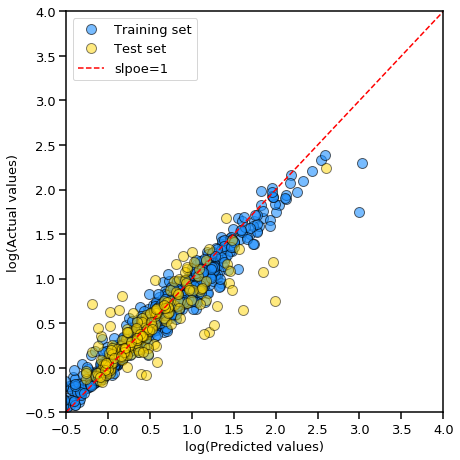

Training set score: 0.95
Test set score: 0.71
Pearson correlation coef, p-value: (0.9817382885998179, 0.0)


In [16]:
## Load data ##
%matplotlib inline
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

%matplotlib inline

df=pd.read_csv('feature.csv',sep=',')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

plt.figure(figsize=(6.5,6.5))

# Shuffle the data to reduce bias
df=shuffle(df)

y1 = df['kL'].values
y=np.log10(y1)

excluded = ["kL","formula","composition","bulkmod"]
X = df.drop(excluded, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

#sample weighted (weight log(tearget) < 1 by factor of 5)
weights=np.array([5 if i < 1 else 1 for i in y_train])

##Predict##
RF = RandomForestRegressor(max_depth=13,n_estimators=100,max_features='auto',
                                random_state=1).fit(X_train, y_train,sample_weight=weights)
#save model using joblib
import joblib
joblib.dump(RF,'FinalKLModelWeighted.joblib')

y_RF_predict1 = RF.predict(X_train)
y_RF_predict2 = RF.predict(X_test)

##Pearson##
Pearson = pearsonr(RF.predict(X_train), y_train)

##Plot predicted value versus the actual target value##
Xa= np.array(y_train)
ya= y_RF_predict1
plt.plot(Xa,ya,'o',markersize=10, color='dodgerblue',mec='k',alpha=0.6,label='Training set')
Xb= np.array(y_test)
yb= y_RF_predict2
plt.plot(Xb,yb,'o',markersize=10, color='gold',mec='k',alpha=0.5,label='Test set')

##Plot a line with slpoe=1##
xx=np.linspace(-0.5,4,1000)
yy=xx
plt.plot(xx,yy,'--r',linewidth=1.5,label= 'slpoe=1')

#plt.axes().set_aspect(2)
plt.legend(loc='upper left',fontsize=13)
plt.xlabel('log(Predicted values)',fontsize=13)
plt.ylabel('log(Actual values)',fontsize=13)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
plt.tick_params(axis='both',width=1.5,length=7,labelsize=13)
plt.tight_layout()
plt.show()

print("Training set score: {:.2f}".format(RF.score(X_train, y_train, sample_weight=weights)))
print("Test set score: {:.2f}".format(RF.score(X_test, y_test)))
print("Pearson correlation coef, p-value:",Pearson)